In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
import numpy as np
from matplotlib import pyplot
from collections import OrderedDict
import cv2
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

train_data = torchvision.datasets.QMNIST('~/Datasets/QMNIST', train=True, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.QMNIST('~/Datasets/QMNIST', train=False, transform=torchvision.transforms.ToTensor())

lr = 0.1
epoch = 10
batch_size=100


train_iter = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_iter = DataLoader(test_data, batch_size=batch_size, shuffle=True)



loss = nn.CrossEntropyLoss()

# for feature, label in train_iter:
#     print(feature.shape)
#     print(label)
#     break

# 返回 shape: 100(batch_size) x 784 的 tensor
class FlattenLayer(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        # 原 shape [batch_size, 1, 28, 28] 返回 [batch_size, 784]
        return x.view(x.shape[0], -1)

num_outputs = 10
    

net = nn.Sequential(FlattenLayer(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 128), nn.ReLU(), nn.Linear(128, 10))

optim = torch.optim.SGD(net.parameters(), lr=lr)


In [5]:
# 训练
for e in range(epoch):
    correct = 0
    total = 0
    for X, y in train_iter:
        y_pred = net(X)
        l = loss(y_pred, y).sum()
        l.backward()
        optim.step()
        optim.zero_grad()
        correct += (y_pred.argmax(dim=1) == y).float().sum()
        total += y.shape[0]
    test_acc = d2l.evaluate_accuracy(test_iter, net)
    print('train accuracy', (correct / total).item())
    print('test accuracy', test_acc)
    


train accuracy 0.9888499975204468
test accuracy 0.9740833333333333
train accuracy 0.9904666543006897
test accuracy 0.97465
train accuracy 0.9921666383743286
test accuracy 0.9752666666666666
train accuracy 0.993399977684021
test accuracy 0.9739166666666667
train accuracy 0.994533360004425
test accuracy 0.9765166666666667
train accuracy 0.9954000115394592
test accuracy 0.9753666666666667
train accuracy 0.9966333508491516
test accuracy 0.9772166666666666
train accuracy 0.9973166584968567
test accuracy 0.9766
train accuracy 0.9979000091552734
test accuracy 0.9782833333333333
train accuracy 0.998449981212616
test accuracy 0.9762


(28, 28)
result is  3


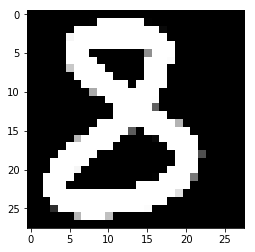

In [14]:
img = cv2.imread('./data/8.png', 0)

unloader = torchvision.transforms.ToPILImage()

r_img = cv2.resize(img, (28, 28))

print(r_img.shape) # (28, 28)

t_img = torchvision.transforms.functional.to_tensor(r_img)



pyplot.imshow(unloader(t_img), cmap="gray")


print('result is ', net(t_img.unsqueeze(0)).argmax().item())

shape torch.Size([1, 28, 28])
test[0] label is  7
predict test[0] is 7


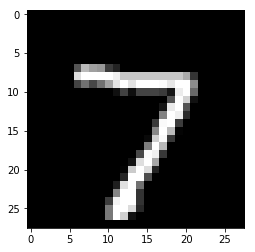

In [4]:
predict_label = test_data[0][1]
predict_data = test_data[0][0]

print('shape', predict_data.shape) # torch.Size([1, 28, 28])


pyplot.imshow(predict_data.view(28, 28), cmap="gray")

print('test[0] label is ', predict_label)
print('predict test[0] is', net(predict_data).argmax().item())